# <center>Exploratory Data Analisys</center>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json

In [2]:
reviews  = pd.read_parquet('../dataset/australian_user_reviews.parquet')
items =  pd.read_parquet('../dataset/australian_users_items.parquet')
games =  pd.read_parquet('../dataset/output_steam_games.parquet')
ranking_genre = pd.read_parquet('../dataset/ranking_genre.parquet')
usersXgenre = pd.read_parquet('../dataset/user_genre.parquet') 
sentiments = pd.read_parquet('../dataset/sentiments.parquet')

La mayor parte de los valores de ´playtime_2weeks´ y ´playtime_forever´ son ceros

In [3]:
items['playtime_forever'].sort_values(ascending=True).value_counts()

playtime_forever
0         1847730
1          101586
2           34391
3           31530
4           29127
           ...   
39568           1
39567           1
39566           1
39563           1
642773          1
Name: count, Length: 48861, dtype: int64

In [4]:
items['playtime_forever'].sort_values(ascending=True).value_counts()

playtime_forever
0         1847730
1          101586
2           34391
3           31530
4           29127
           ...   
39568           1
39567           1
39566           1
39563           1
642773          1
Name: count, Length: 48861, dtype: int64

Calcular el índice intercuartil para playtime_2weeks

Puede notarse que por la gran frecuencia de ceros no es posible eliminar datos atipicos

In [5]:
Q1_2weeks = items['playtime_2weeks'].quantile(0.25)
Q3_2weeks = items['playtime_2weeks'].quantile(0.75)
IQR_2weeks = Q3_2weeks - Q1_2weeks

if Q1_2weeks - 1.5 * IQR_2weeks < 0:
    lower_limit_2weeks = 0
else:
    lower_limit_2weeks = Q1_2weeks - 1.5 * IQR_2weeks

upper_limit_2weeks = Q3_2weeks + 1.5 * IQR_2weeks

print("Limite inferior", lower_limit_2weeks, "Limite superior", upper_limit_2weeks)

Limite inferior 0.0 Limite superior 0.0


Calcular el índice intercuartil para la columna playtime_forever

In [6]:
Q1_4ever = items['playtime_forever'].quantile(0.25)
Q3_4ever = items['playtime_forever'].quantile(0.75)
IQR_4ever = Q3_4ever - Q1_4ever

if Q1_4ever - 1.5 * IQR_4ever < 0:
    lower_limit_4ever = 0
else:
    lower_limit_4ever = Q1_4ever - 1.5 * IQR_4ever

upper_limit_4ever = Q3_4ever + 1.5 * IQR_4ever

print("Limite inferior", lower_limit_4ever, "Limite superior", upper_limit_4ever)

Limite inferior 0 Limite superior 887.5


Gráfica sin valores atípicos de playtime_forever

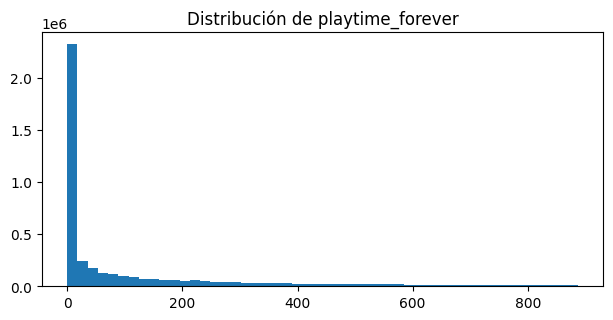

In [7]:
playtime_4ever = items[(items['playtime_forever'] >= lower_limit_4ever) & (items['playtime_forever'] <= upper_limit_4ever)]
playtime_4ever = playtime_4ever.dropna(subset=['playtime_forever'])

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(playtime_4ever['playtime_forever'], bins=50)
plt.title('Distribución de playtime_forever')
plt.tight_layout()
plt.show()

Top 10 de juegos mas jugados

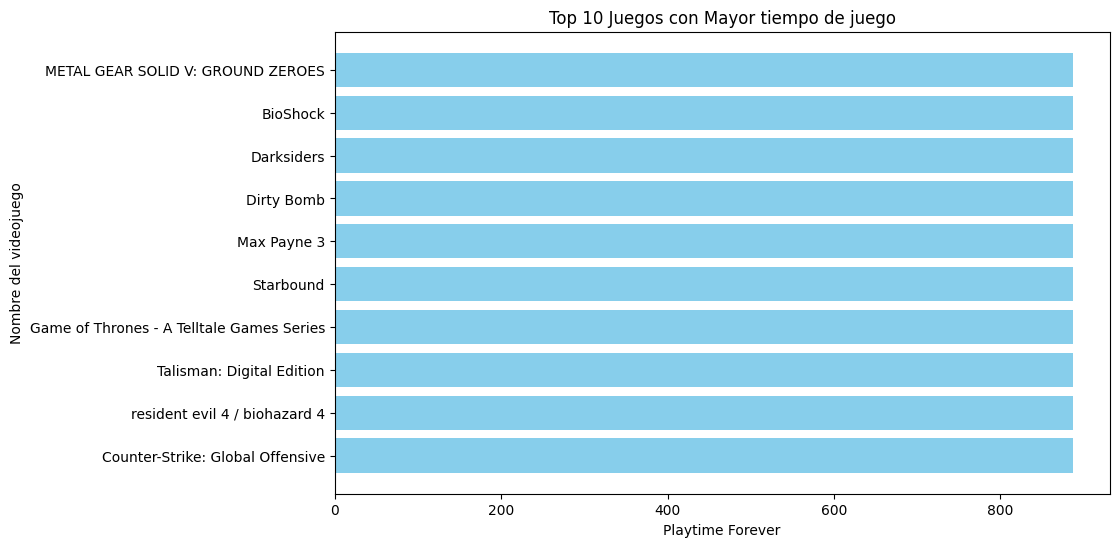

In [8]:
# Ordenar el DataFrame por playtime_forever de forma descendente y seleccionar las 10 mejores filas
top_10_games = playtime_4ever.sort_values(by='playtime_forever', ascending=False).head(10)

# Crear un gráfico de barras para visualizar los 10 juegos con mayor playtime_forever
plt.figure(figsize=(10, 6))
plt.barh(top_10_games['item_name'], top_10_games['playtime_forever'], color='skyblue')
plt.xlabel('Playtime Forever')
plt.ylabel('Nombre del videojuego')
plt.title('Top 10 Juegos con Mayor tiempo de juego')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el juego con más playtime en la parte superior
plt.show()


El videojuego más jugado de los últimos 3 años

In [9]:
# Suponiendo que 'posted_date' es una cadena de texto en formato 'yyyy-mm-dd'
reviews['posted_date'] = pd.to_datetime(reviews['posted_date'])

print("Número de fechas no válidas antes de eliminar:", reviews['posted_date'].isnull().sum())

# Eliminar las filas con fechas no válidas (valores nulos) en 'posted_date'
reviews = reviews.dropna(subset=['posted_date'])

# Después de eliminar fechas no válidas, puedes verificar cuántas fechas no válidas quedan
print("Número de fechas no válidas después de eliminar:", reviews['posted_date'].isnull().sum())


Número de fechas no válidas antes de eliminar: 9932
Número de fechas no válidas después de eliminar: 0


In [10]:
# Filtrar las reseñas y los tiempos de juego de la última década
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2013-12-31')
filtered_reviews = reviews[(reviews['posted_date'] >= start_date) & (reviews['posted_date'] <= end_date)]
fecha = filtered_reviews[['posted_date','item_id']]
data = playtime_4ever[['item_id','item_name','playtime_forever']]
combined_data = data.merge(fecha, on='item_id', how='inner')

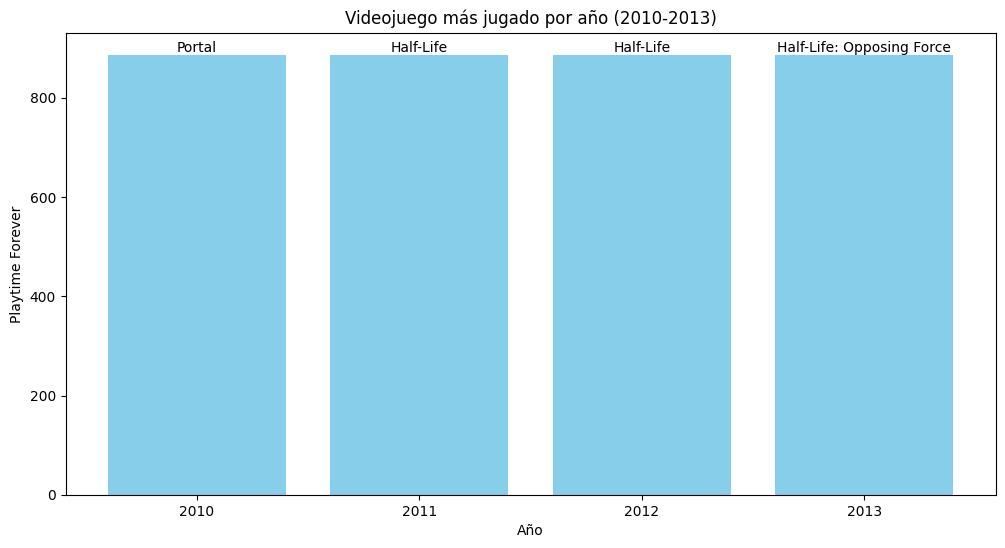

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'item_id', 'item_name', 'playtime_forever' y 'posted_date'

# Agrupar los datos por año y encontrar el juego más jugado en cada año
most_played_by_year = combined_data.groupby(combined_data['posted_date'].dt.year)['playtime_forever'].idxmax()
most_played_games = combined_data.loc[most_played_by_year, ['posted_date', 'item_name', 'playtime_forever']]

# Crear un gráfico de barras que muestra el videojuego más jugado por año
plt.figure(figsize=(12, 6))
plt.bar(most_played_games['posted_date'].dt.year, most_played_games['playtime_forever'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Playtime Forever')
plt.title('Videojuego más jugado por año (2010-2013)')

# Agregar etiquetas con el nombre del juego correspondiente
for i, row in most_played_games.iterrows():
    plt.text(row['posted_date'].year, row['playtime_forever'], row['item_name'], ha='center', va='bottom')

plt.xticks(most_played_games['posted_date'].dt.year)
plt.show()


In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame movies
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'release_year', 'return']

# Crear una figura y ejes para los boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 6))

# Generar los boxplots y agregarlos a los ejes correspondientes
for i, column in enumerate(numeric_columns):
    axes[i].boxplot(movies[column].dropna())
    axes[i].set_title('{}'.format(column))
    axes[i].set_ylabel('Valores')

# Ajustar espaciado y mostrar la figura
fig.suptitle('Valores Atípicos', ha='center')
plt.tight_layout()
plt.show()

In [21]:
cantidad = items['item_id'].value_counts()

In [44]:
resultado = []
for i in cantidad:
    try:
        filtro = games[games['id'] == cantidad.index[i]]
        dic = {"id": filtro['id'].iloc[0],"developer":filtro['developer'].iloc[0],"price":filtro['price'].iloc[0],"quantity":cantidad.iloc[i]}
        resultado.append(dic)
    except:
        dic = {"id":None ,"developer":None,"price":None,"quantity":None}
        resultado.append(dic)
df = pd.DataFrame(resultado)
ventas = df.drop_duplicates(subset=['id'])

In [54]:
ventas['ventas'] = ventas['price'] * ventas['quantity']

C:\Users\stdio\AppData\Local\Temp\ipykernel_16612\330274414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas['ventas'] = ventas['price'] * ventas['quantity']


In [56]:
ventasxdesarrollador = ventas.groupby(['developer']).sum()

In [60]:
topdev = ventasxdesarrollador.sort_values(by='ventas', ascending=False)
top10dev = top10dev.head(10)

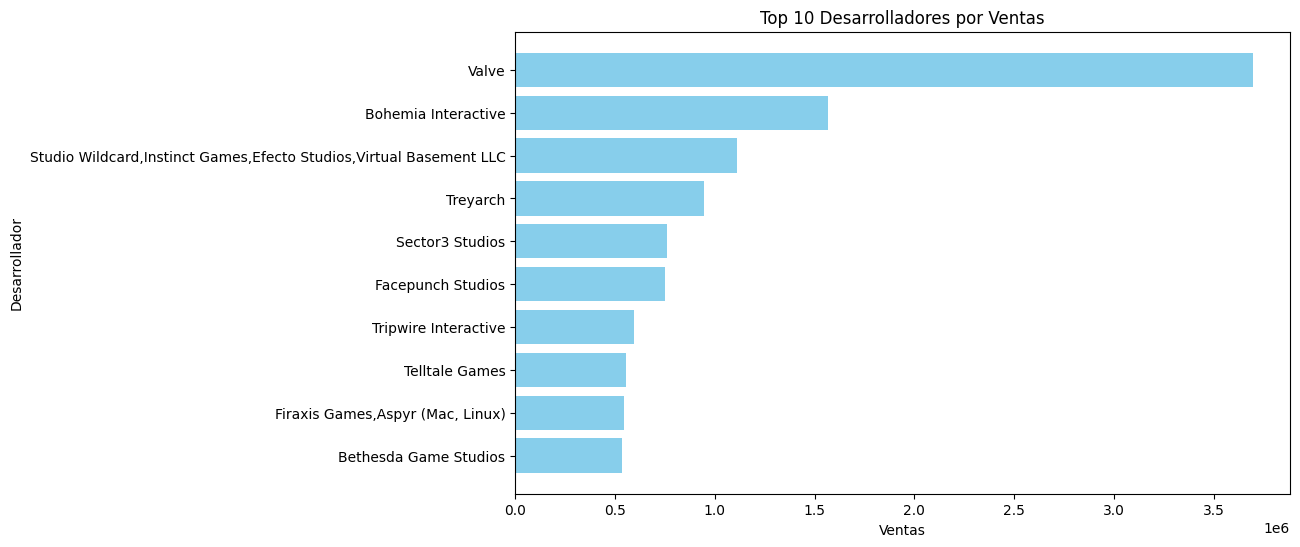

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top10dev.index, top10dev['ventas'], color='skyblue')
plt.xlabel('Ventas')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores por Ventas')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el desarrollador con más ventas en la parte superior
plt.show()
